In [ ]:
pip install xgboost

In [ ]:
# Simple Linear Regression Housing Price Predictions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df=pd.read_csv('Bangalore.csv')


In [ ]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [ ]:
df.shape

(6207, 40)

In [ ]:
df=df[['No. of Bedrooms','Area','Price']]

In [ ]:
df=df.rename(columns={'No. of Bedrooms':'bedrooms','Area':'area','Price':'price'})

In [ ]:
df.head()

,bedrooms,area,price
0,4,3340,30000000
1,2,1045,7888000
2,2,1179,4866000
3,3,1675,8358000
4,3,1670,6845000


In [ ]:
df.isnull().sum()

bedrooms    0
area        0
price       0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df=df.iloc[0:1000]

In [ ]:
df.shape

(1000, 3)

In [ ]:
X = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# You can print the coefficients to understand the relationship
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('score:', regressor.score(X_train, y_train))

Coefficients: [16854.028626]
Intercept: -15575815.758281907
score: 0.8477891362362493


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train,y_train))

[00:04:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.9920958893531102


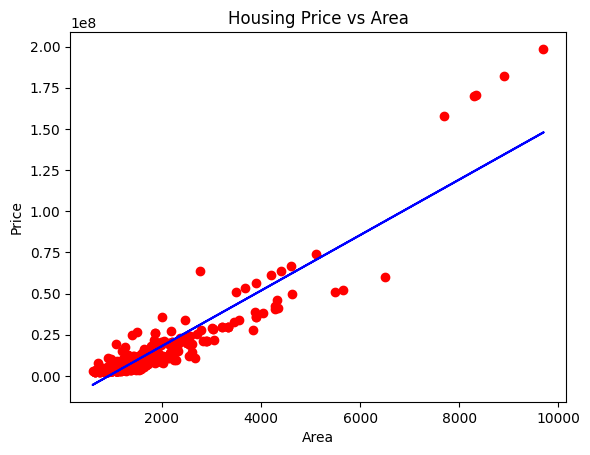

In [ ]:
# Predicting
y_pred = regressor.predict(X_test)

# Visualization
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Housing Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


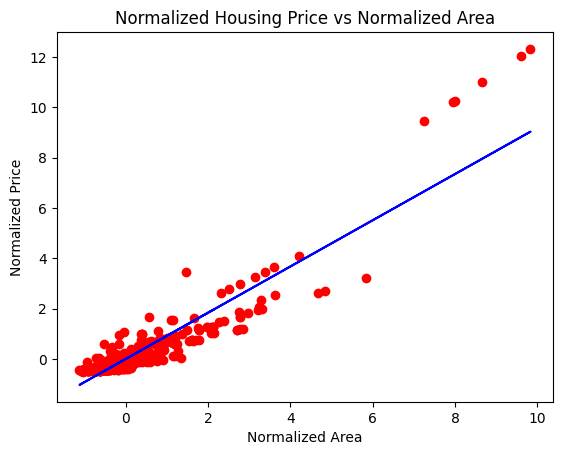

In [ ]:
# Gradient descent for Simple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(df['area']))
y_normalized = normalize(np.array(df['price']))

# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Initialization
m = len(df['area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# Gradient Descent
for _ in range(num_iterations):
    # Predictions
    y_pred = theta0 + theta1 * X

    # Derivatives
    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)

    # Update thetas
    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

# Visualization
plt.scatter(X, y_normalized, color='red')
plt.plot(X, theta0 + theta1 * X, color='blue')
plt.title('Normalized Housing Price vs Normalized Area')
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Price')
plt.show()


In [ ]:
theta0

9.299644387894558e-17

In [ ]:
theta1

0.9185144180427028

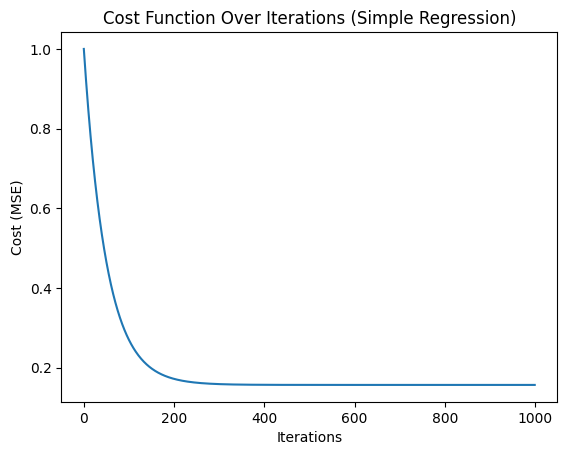

In [ ]:
# Cost function for Simple linear Regression
import numpy as np
import matplotlib.pyplot as plt
def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(df['area']))
y_normalized = normalize(np.array(df['price']))


# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Initialization
m = len(df['area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# Cost history to store MSE values for each iteration
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    cost_history.append(cost)

    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)

    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

plt.plot(cost_history)
plt.title('Cost Function Over Iterations (Simple Regression)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()


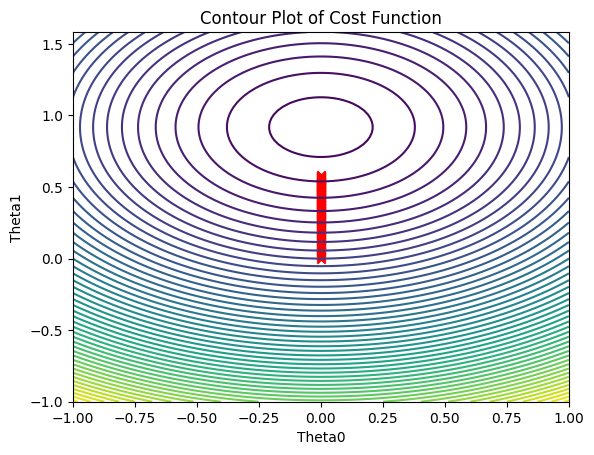

In [ ]:
# Contour plot of Cost Function
import numpy as np
import matplotlib.pyplot as plt

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(df['area']))
y_normalized = normalize(np.array(df['price']))

# Hyperparameters
alpha = 0.01
num_iterations = 100

# Initialization
m = len(df['area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# To store the path taken by gradient descent
theta0_history = [theta0]
theta1_history = [theta1]
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    cost_history.append(cost)

    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)

    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

    theta0_history.append(theta0)
    theta1_history.append(theta1)

# Generate a grid of theta0 and theta1 values for the contour plot
theta0_vals = np.linspace(min(theta0_history) - 1, max(theta0_history) + 1, 100)
theta1_vals = np.linspace(min(theta1_history) - 1, max(theta1_history) + 1, 100)

# Calculate the cost function for each combination of theta0 and theta1
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X
        J_vals[i, j] = (1/m) * sum((y_pred - y_normalized)**2)

# Create the contour plot
plt.contour(theta0_vals, theta1_vals, J_vals.T, 50)
plt.scatter(theta0_history, theta1_history, c='red', marker='x')
plt.title('Contour Plot of Cost Function')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.show()


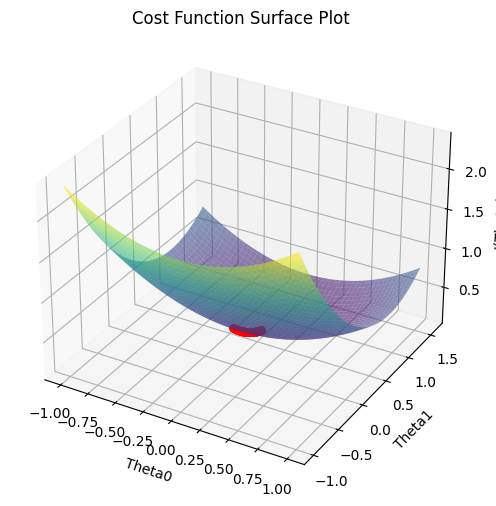

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(df['area']))
y_normalized = normalize(np.array(df['price']))

# Hyperparameters
alpha = 0.01
num_iterations = 100

# Initialization
m = len(df['area'])
theta0 = 0  # intercept
theta1 = 0  # slope

theta0_history = []
theta1_history = []
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/(2*m)) * sum((y_pred - y_normalized)**2)  # Use (1/2m) for MSE

    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)

    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

    theta0_history.append(theta0)
    theta1_history.append(theta1)
    cost_history.append(cost)

# Grid of theta values
theta0_vals = np.linspace(min(theta0_history) - 1, max(theta0_history) + 1, 100)
theta1_vals = np.linspace(min(theta1_history) - 1, max(theta1_history) + 1, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X
        J_vals[i, j] = (1/(2*m)) * sum((y_pred - y_normalized)**2)

# 3D Surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals.T, cmap='viridis', alpha=0.6)

# Gradient descent path
ax.plot(theta0_history, theta1_history, cost_history, color='red', marker='o', markersize=5)

ax.set_title('Cost Function Surface Plot')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J(Theta)')
plt.show()


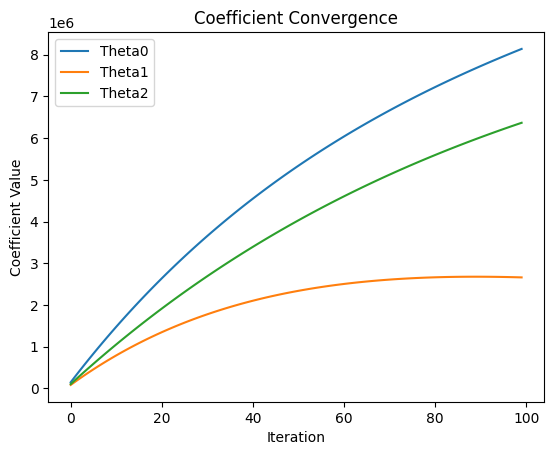

Predicted Prices:
[-4431193.19229453 17167804.99696993]
Parameters: [8140094.18818233 2659404.9064499  6368305.9023377 ]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract features and target variable
X = df[['area', 'bedrooms']]  # Add more features as needed
y = df['price']

# Normalize features
def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

X_normalized = X.apply(normalize)

# Hyperparameters
alpha = 0.01
num_iterations = 100

# Initialization
m = len(df)
n_features = len(X.columns)
theta = np.zeros(n_features + 1)  # Initialize coefficients (including intercept)

# Add a column of ones for the intercept term
X_normalized['intercept'] = 1

# Initialize history for visualization (optional)
theta_history = []

# Gradient Descent
for _ in range(num_iterations):
    # Predictions
    y_pred = np.dot(X_normalized, theta)

    # Calculate errors
    errors = y_pred - y

    # Update coefficients (vectorized)
    gradient = (1/m) * np.dot(errors, X_normalized)
    theta = theta - alpha * gradient

    # Store thetas for visualization (optional)
    theta_history.append(theta.copy())

# Visualize the convergence of coefficients (optional)
for i in range(n_features + 1):
    plt.plot(range(num_iterations), [theta_history[j][i] for j in range(num_iterations)], label=f'Theta{i}')

plt.title('Coefficient Convergence')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Predict new values
new_data = pd.DataFrame({'area': [1200, 1500], 'bedrooms': [3, 4]})
new_data_normalized = new_data.apply(normalize)
new_data_normalized['intercept'] = 1
predicted_prices = np.dot(new_data_normalized, theta)

print("Predicted Prices:")
print(predicted_prices)
print("Parameters:", theta)

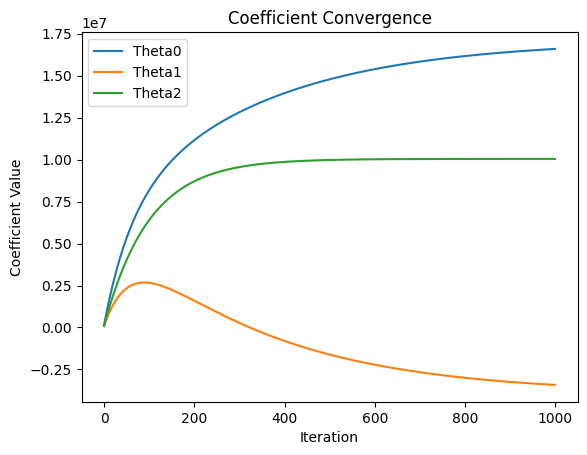

Predicted Prices:
[-3129344.62295506 23218795.20287027]
Parameters: [16595924.77319751 -3421854.86028484 10044725.28995761]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract features and target variable
X = df[['area', 'bedrooms']]  # Add more features as needed
y = df['price']

# Normalize features
def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

X_normalized = X.apply(normalize)

# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Initialization
m = len(df)
n_features = len(X.columns)
theta = np.zeros(n_features + 1)  # Initialize coefficients (including intercept)

# Add a column of ones for the intercept term
X_normalized['intercept'] = 1

# Initialize history for visualization (optional)
theta_history = []

# Gradient Descent
for _ in range(num_iterations):
    # Predictions
    y_pred = np.dot(X_normalized, theta)

    # Calculate errors
    errors = y_pred - y

    # Update coefficients (vectorized)
    gradient = (1/m) * np.dot(errors, X_normalized)
    theta = theta - alpha * gradient

    # Store thetas for visualization (optional)
    theta_history.append(theta.copy())

# Visualize the convergence of coefficients (optional)
for i in range(n_features + 1):
    plt.plot(range(num_iterations), [theta_history[j][i] for j in range(num_iterations)], label=f'Theta{i}')

plt.title('Coefficient Convergence')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Predict new values
new_data = pd.DataFrame({'area': [1200, 1500], 'bedrooms': [3, 4]})
new_data_normalized = new_data.apply(normalize)
new_data_normalized['intercept'] = 1
predicted_prices = np.dot(new_data_normalized, theta)

print("Predicted Prices:")
print(predicted_prices)
print("Parameters:", theta)

In [ ]:
theta0

4.201500258815828e-17

In [ ]:
theta1

0.5823335751801638

In [ ]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
area,3340,1045,1179,1675,1670,1220,2502,1438,1405,660,...,2437,1687,1712,1812,1911,3870,1135,1020,985,980
bedrooms,4,2,2,3,3,2,4,3,3,1,...,3,3,3,3,3,4,2,2,2,2


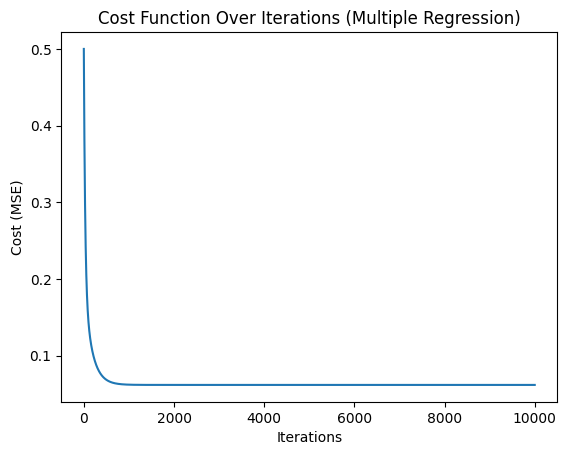

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Hyperparameters
alpha = 0.01
num_iterations = 10000

# Initialization
m = len(df)
X0 = np.ones(m)
X1 = normalize(np.array(df['area']))
X2 = normalize(np.array(df['bedrooms']))
y_normalized = normalize(np.array(df['price']))

X = np.array([X0, X1, X2]).T
theta = np.zeros(3)

# Cost history to store MSE values for each iteration
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m)) * sum((y_pred - y_normalized)**2)  # Use (1/2m) for MSE
    cost_history.append(cost)

    gradient = (1/m) * np.dot(X.T, (y_pred - y_normalized))
    theta -= alpha * gradient

plt.plot(cost_history)
plt.title('Cost Function Over Iterations (Multiple Regression)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()
